**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [45]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [46]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [47]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [48]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [49]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [50]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [51]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [52]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")    # 讀取 API Key
os.environ["GOOGLE_API_KEY"] = api_key   # 將 API Key 寫入 python 的環境
client = genai.Client(api_key=api_key)   # 建立物件登入Gemeni

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt), #多模態輸入
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:# 是否要回傳整個模型物件
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info: # 是否輸出模型 TOKEN 資料
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info: # 是否輸出模型 TOKEN 資料
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [53]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [54]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [55]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [56]:
# Answer here
from IPython.display import display, Markdown

#1
print("Q1: Run it with the same model as the example")
input_prompt = ["What is Data Preprocessing? and instruction in 150 word"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response))
print(f"model info: {logs}")
print("=====================================================================================================================================")

#2
print("Q2: Run it with a different gemini model from the available options for the API.")
input_prompt = ["What is Data Preprocessing? and instruction in 150 word"]
text_response, logs = prompt_gemini(model_name= "gemini-2.5-flash",input_prompt = input_prompt, with_tokens_info = True)

# 推論回答
display(Markdown(text_response))

# 模型資訊
print(f"model info: {logs}")
print("=====================================================================================================================================")

#3: Discuss the differences on the results with different models.
"""
1. 最明顯的點在於內容生成的不同，這非常的合理，即便使用相同的 transformer 架構，其所訓練的權重不同必定回影響到文字生成的不同
2. output_tokens 的不同，我在 prompt 中限制回答字數，gemini-2.5-flash-lite 較好的貼近要求
3. gemini-2.5-flash 的回答較為完善，可能與模型在 output 時的設定權重有關
"""

#4: Discuss what would happen if you change the system prompt.
print("Q4: Discuss what would happen if you change the system prompt.")
input_prompt = ["What is Data Preprocessing? and instruction in 150 word"]
text_response, logs = prompt_gemini(model_name= "gemini-2.5-flash",input_prompt = input_prompt, with_tokens_info = True
                                    , system_instruction= "You are a datamining expert")
display(Markdown(text_response))
print(f"model info: {logs}")
"""
1. 因我將system prompt 改為 "You are a datamining expert" 相比於 "You are a helpful assistant" 多了 2 個 tokens 可能原因
為分詞將 dataminning 分為 "data" "min" "**ing" 的緣故。
2. 相較於之前的回答，透過改變prompt，這次的回答更加專業。
3. 不過也造成教無法貼近字數的要求，可能與模型在品質的權重放得比 form 還重的原因有關。
"""

Q1: Run it with the same model as the example


Data preprocessing is the crucial initial step in machine learning and data analysis. It involves cleaning, transforming, and preparing raw data to make it suitable for modeling. This process addresses issues like missing values, outliers, inconsistent formats, and irrelevant features.

Key steps include:

*   **Data Cleaning:** Handling missing data (imputation or removal), correcting errors, and removing duplicates.
*   **Data Transformation:** Scaling numerical features (e.g., normalization, standardization), encoding categorical variables (e.g., one-hot encoding), and creating new features.
*   **Data Reduction:** Reducing dimensionality through techniques like PCA or feature selection to improve model efficiency and performance.

Effective data preprocessing significantly impacts the accuracy and reliability of subsequent analysis and model predictions.

model info: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 21, 'output_tokens': 153}
Q2: Run it with a different gemini model from the available options for the API.


Data Preprocessing is a crucial step in the data mining and machine learning pipeline, involving transforming raw data into an understandable and high-quality format. Raw data is often incomplete, inconsistent, or contains errors, making it unsuitable for direct analysis or model training.

The primary goal of preprocessing is to improve data quality, efficiency, and ultimately, the accuracy and reliability of subsequent analytical tasks or predictive models.

Key techniques include:
*   **Data Cleaning:** Handling missing values (imputation), smoothing noisy data, and identifying/removing outliers.
*   **Data Integration:** Combining data from multiple sources into a coherent store.
*   **Data Transformation:** Normalizing or standardizing data to a specific range, or aggregating it.
*   **Data Reduction:** Obtaining a reduced representation of the data while maintaining its integrity, often through dimensionality reduction or numerosity reduction.

By meticulously preparing data, preprocessing ensures that algorithms receive clean, consistent, and relevant inputs, leading to more robust and insightful results.

model info: {'model': 'gemini-2.5-flash', 'input_tokens': 21, 'output_tokens': 203}
Q4: Discuss what would happen if you change the system prompt.


**Data Preprocessing** is a critical phase in data mining that transforms raw, often messy data into a clean, consistent, and suitable format for analysis and machine learning models. Raw data typically contains noise, missing values, inconsistencies, and irrelevant features, which can severely hinder model performance and lead to inaccurate insights.

Key techniques include:
*   **Data Cleaning:** Handling missing values (imputation), smoothing noisy data, and identifying/removing outliers.
*   **Data Transformation:** Normalizing or standardizing data, aggregating, or discretizing attributes to fit model requirements.
*   **Data Reduction:** Reducing data volume (e.g., dimensionality reduction like PCA, or numerosity reduction) while preserving integrity, improving efficiency.

The ultimate goal is to enhance data quality, improve computational efficiency, and ensure that subsequent analytical models are built on reliable, high-quality information, leading to more accurate and robust predictions.

**Instruction:** Always dedicate significant time to data preprocessing; it's often the most impactful phase for achieving successful and reliable data mining results.

model info: {'model': 'gemini-2.5-flash', 'input_tokens': 23, 'output_tokens': 215}


'\n1. 因我將system prompt 改為 "You are a datamining expert" 相比於 "You are a helpful assistant" 多了 2 個 tokens 可能原因\n為分詞將 dataminning 分為 "data" "min" "**ing" 的緣故。\n2. 相較於之前的回答，透過改變prompt，這次的回答更加專業。\n3. 不過也造成教無法貼近字數的要求，可能與模型在品質的權重放得比 form 還重的原因有關。\n'

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [57]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [58]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic]) # 設定型式，LLM 提供 JSON 格式
print(text_response)


[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [59]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response) # 將 JSON 格式轉換為 python 物件
print(structured_resp)
print(type(structured_resp))


[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [60]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [61]:
# Answer here
from pydantic import BaseModel, Field
from typing import Optional
import json

# 多寫一層: 增加成就(因寫在最內層，故須先定義)
class Achievements(BaseModel):
    achievements: str= Field(description="Achievements obtained during that period, format: year: achievement")
    team_achievements: str= Field(description= "Team's achievements obtained during that period, format: year: team achievement")

class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str
    record: list[Achievements]
    
class Topic(BaseModel):
    summary: str= Field(description= "A summary introducing the athlete, including National, age, career, name(both in english and chinese)")
    topic_name: str
    subsections: list[Subsection]
    
    

input_prompt = ["Who is Shohei Ohtani?"]
# prompt engineering: 用預設的 system_instruction 回答不好
text_response = prompt_gemini(input_prompt = input_prompt, schema=list[Topic], system_instruction="you are a baseball fan")
structured_resp = json.loads(text_response)


for topic in structured_resp:
    print(topic["summary"]) # 顯示簡介
    print(topic["topic_name"], "\n")
    

    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")
        # 列出各時代成就
        for records in subsection["record"]:
            # 個人成就
            print("\t\t\t",records["achievements"], "\n")
            # 團體成就
            print("\t\t\t",records["team_achievements"], "\n")



Shohei Ohtani (大谷 翔平), a 29-year-old Japanese professional baseball player, is a true phenomenon in Major League Baseball. Known for his exceptional two-way abilities as both a pitcher and a hitter, he has revolutionized the game and achieved unprecedented success.
Shohei Ohtani 

	 Early Career and Rise in Japan 

		 Ohtani began his professional career in Japan with the Hokkaido Nippon-Ham Fighters of Nippon Professional Baseball (NPB). From the outset, he showcased his remarkable talent, excelling as both a pitcher and a hitter, a rarity in modern baseball. 

			 2013: Rookie of the Year (Pacific League) 

			 2016: Japan Series Champions 

			 2015, 2016: Pacific League MVP 

			 2016: Pacific League Pennant 

	 MLB Debut and Immediate Impact 

		 In 2018, Ohtani made the highly anticipated move to Major League Baseball, signing with the Los Angeles Angels. He immediately made waves, becoming the first player in over a century to be an All-Star as both a pitcher and a hitter in the

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [62]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [63]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [64]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [68]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding= "utf-8") as f: # 編碼問題
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [69]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 480.45 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|█████████▉| 8.58k/8.58k [00:00<?, ?B/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [71]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r",encoding= "utf-8") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [72]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [73]:
# Answer here

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [74]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [75]:
train_df[0:4]

,id,text,emotion,intensity
1960,21103,@turoturok We're glad to hear that everything...,fear,0.167
520,10520,@AuntieSupreme @KimberlyCarole y'all found me ...,anger,0.438
680,10680,@PerfectQuartz She's jogging a bit to stay bes...,anger,0.375
899,20042,@danisnotonfire you made me cry and shake to t...,fear,0.860


In [76]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame: #-> return dataframe
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples)))) #照比例抽樣
    )

    # Adjust for rounding errors to get the exact number of samples: 補齊少抽樣，刪減多抽樣的情況
    current_samples = len(sampled_df)   #目前抽取比數
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index) # 找出沒有抽過樣的 data
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42) # 不可使用 iloc 因為有些 data 被抽走了
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\user\AppData\Local\Temp\ipykernel_10944\1061528413.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\user\AppData\Local\Temp\ipykernel_10944\1061528413.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [77]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [78]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [79]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [80]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [81]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [82]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
237,10237,They're like the rape apologists who (inadvert...,anger,0.583,"[values=[0.019575465, -0.0023821425, -0.005772...","[0.019575465, -0.0023821425, -0.005772871, -0...."
850,10850,@cburt43 turn that frown upside down,anger,0.125,"[values=[0.009223775, 0.0012783771, -0.0262989...","[0.009223775, 0.0012783771, -0.0262989, -0.081..."
378,10378,@OstinOng YUUUHH 🙄😭 plus clin ep and prevmed u...,anger,0.521,"[values=[0.029011246, -0.023729235, -0.0023395...","[0.029011246, -0.023729235, -0.0023395545, -0...."
727,10727,@lethargytyler ehhh I guess. I want to everyon...,anger,0.333,"[values=[-0.020777116, 0.016601637, -0.0006963...","[-0.020777116, 0.016601637, -0.0006963124, -0...."
536,10536,@iStoleFreeHugs @stephlaris lol I'm happy with...,anger,0.438,"[values=[0.022524541, 0.011223555, -0.04876244...","[0.022524541, 0.011223555, -0.04876244, -0.083..."
...,...,...,...,...,...,...
3456,40629,New job training= too much meat eating! Oh wel...,sadness,0.312,"[values=[-0.016958406, 0.005250419, -0.0059156...","[-0.016958406, 0.005250419, -0.0059156613, -0...."
3080,40253,@V_of_Europe @ckolacia MSM relentlessly saying...,sadness,0.604,"[values=[0.0024116065, -0.009090501, 0.0228643...","[0.0024116065, -0.009090501, 0.022864353, -0.0..."
3385,40558,I'm too sober time to get shit faced,sadness,0.360,"[values=[-0.020733666, -0.005211618, -0.023803...","[-0.020733666, -0.005211618, -0.02380314, -0.0..."
3302,40475,@jeremycorbyn @magstogether my god is @jeremyc...,sadness,0.417,"[values=[-0.017366227, -0.019930976, 0.0018708...","[-0.017366227, -0.019930976, 0.0018708208, -0...."


In [83]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
222,30851,Heather that was #hilarious! @MsHeatherBates @...,joy,0.812,"[values=[-0.023940003, 0.0017229738, 0.0072910...","[-0.023940003, 0.0017229738, 0.007291086, -0.0..."
177,21240,Tweeting from the sporadic wifi on the tube #p...,fear,0.434,"[values=[-0.007219498, 0.00479843, -0.01259315...","[-0.007219498, 0.00479843, -0.012593151, -0.10..."
63,10920,"Why to have vanity sizes?Now sizes S,XS(evenXX...",anger,0.518,"[values=[-0.0028998374, -0.02078183, 0.0164787...","[-0.0028998374, -0.02078183, 0.016478756, -0.0..."
218,30847,Somebody who has braved the storm is brewing.,joy,0.292,"[values=[0.009566086, 0.016426472, 0.002554025...","[0.009566086, 0.016426472, 0.0025540253, -0.09..."
29,10886,@isthataspider @dhodgs i will fight this guy! ...,anger,0.708,"[values=[-0.0165704, 0.014682377, 0.01964287, ...","[-0.0165704, 0.014682377, 0.01964287, -0.05526..."
337,40850,aaahhhh! a little @OtisRedding to soothe the s...,sadness,0.197,"[values=[-0.009578301, -0.006965374, -0.013988...","[-0.009578301, -0.006965374, -0.013988109, -0...."
180,21243,"If i start growing out my mustache now, I can ...",fear,0.250,"[values=[-0.013611719, -0.008574327, 0.0092285...","[-0.013611719, -0.008574327, 0.009228598, -0.0..."
342,40855,Common app just randomly logged me out as I wa...,sadness,0.833,"[values=[0.0018189758, 0.023590546, -0.0067852...","[0.0018189758, 0.023590546, -0.0067852526, -0...."
269,30898,@r0Ils ppl get triggered over u smiling they'r...,joy,0.170,"[values=[-0.0058842055, 0.012170943, -0.017462...","[-0.0058842055, 0.012170943, -0.017462442, -0...."
47,10904,#oow16 #sting decent new song,anger,0.125,"[values=[-0.0081596095, -0.0066988626, 0.02333...","[-0.0081596095, -0.0066988626, 0.023331072, -0..."


In [84]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [85]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [86]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [87]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28)
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

c:\Users\user\Desktop\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [88]:
# Answer here
import umap
import pandas as pd
# 使用 UMAP 轉換為 3 維
reducer_3d = umap.UMAP(n_components=3, metric= "cosine", random_state= 42)
embedding_3d = reducer_3d.fit_transform(X_embeddings) 

# create a dataframe for plot 
df_plot = pd.DataFrame(embedding_3d, columns= ["UMAP1", "UMAP2", "UMAP3"])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']

# Visualize the embeddings with Plotly
fig = px.scatter_3d(
    df_plot,
    width=1000,   # 調整圖寬度
    height=1000,   # 調整圖高度
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='3D UMAP Projection of Text Embeddings'
)

fig.show()
"""
可看下方截圖角度
相似處: 
    1.分群效果依舊不好
    2.可由不同角度觀察分佈狀況
相異處:
    1.在多個觀測角度可發現與 2D 比較，出現部分分群，但某些點位卻更加混亂與不同情緒分類出現重疊現象(overlap)
    2.某些角度下，重疊的點位重疊(overlap)情況增加
"""


c:\Users\user\Desktop\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



'\n可看下方截圖角度\n相似處: \n    1.分群效果依舊不好\n    2.可由不同角度觀察分佈狀況\n相異處:\n    1.在多個觀測角度可發現與 2D 比較，出現部分分群，但某些點位卻更加混亂與不同情緒分類出現重疊現象(overlap)\n    2.某些角度下，重疊的點位重疊(overlap)情況增加\n'

#### 分群效果略為增加，同時 overlap 的情形也增加
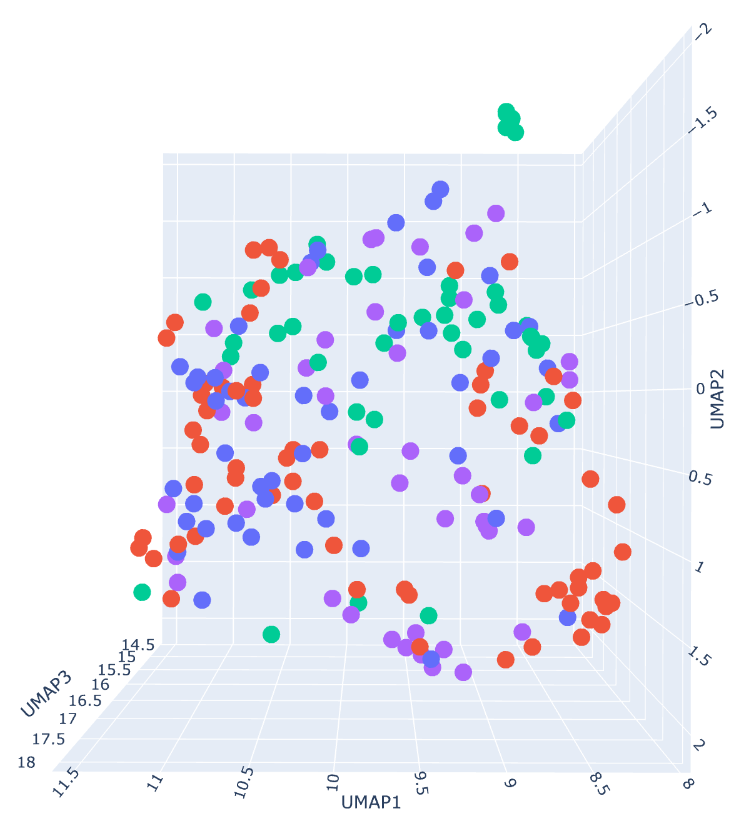

---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [89]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [90]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [91]:
# Answer here


---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [92]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:                # 達每分鐘呼叫上限
        elapsed_time = current_time - first_request_time # 距離第一次呼叫過了多久
        if elapsed_time < 60:                            
            wait_time = 60 - elapsed_time                # 距離 1 分鐘時間還需要多久
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category: 從已經有的 data 中撈出相同 emotion 的資料當做 example
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes: #如果為空值或不在類別中
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result: # 如果回傳空值
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True) # exist_ok 資料夾已存在也 OK!(不覆蓋)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:10<00:03,  1.36it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.38 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:06<00:06,  1.51it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.63 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:09,  1.61it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.73 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.26 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:58<00:03,  1.46it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.17 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:51<00:00,  5.56s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 53.75%
              precision    recall  f1-score   support

       anger       0.42      0.65      0.51        20
        fear       1.00      0.20      0.33        20
         joy       0.55      0.80      0.65        20
     sadness       0.62      0.50      0.56        20

    accuracy                           0.54        80
   macro avg       0.65      0.54      0.51        80
weighted avg       0.65      0.54      0.51        80



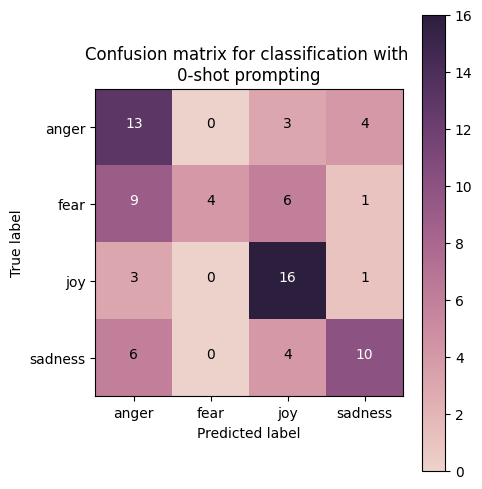

In [94]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: You complain all the time and then wonder why people never want to see you. You acc rile me up. Stfuuu!!!!
Class: anger

Text: A Lysol can got stuck in spray position and we're all slowly suffocating from the trash can that smells like a Febreeze factory. 
Class: fear

Text: her fingers slide along your thighs, caressing the skin before she's leaning down, down, down and the first lick is teasing n playful.
Class: joy

Text: @lebara - worst possible decision I could have made when arriving in the UK. Shocking service. Poor coverage. #unhappy
Class: sadness




Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:07<00:06,  1.47it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 45.606101626s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:04<00:09,  1.39it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 34.394743948s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:52<01:16,  7.68s/it]

Rate limit of 15 requests per minute reached. Waiting for 3.92 seconds.


Processing samples for emotion: joy...:  15%|█▌        | 3/20 [00:02<00:13,  1.25it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 32.269369104s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:49<03:06, 12.41s/it]

Rate limit of 15 requests per minute reached. Waiting for 2.24 seconds.


Processing samples for emotion: joy...:  95%|█████████▌| 19/20 [01:03<00:00,  1.20it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 31.424220049s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 2.59 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:14<00:04,  1.24it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.69 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:06<00:00,  3.34s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 58.75%
              precision    recall  f1-score   support

       anger       0.54      0.65      0.59        20
        fear       1.00      0.40      0.57        20
         joy       0.60      0.75      0.67        20
     sadness       0.48      0.55      0.51        20

    accuracy                           0.59        80
   macro avg       0.65      0.59      0.59        80
weighted avg       0.65      0.59      0.59        80



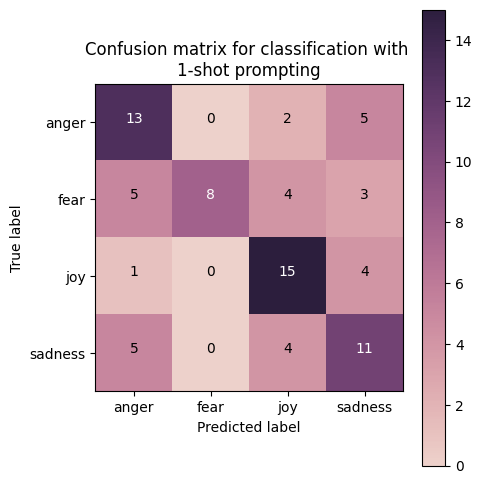

In [95]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: You complain all the time and then wonder why people never want to see you. You acc rile me up. Stfuuu!!!!
Class: anger

Text: @soyoprincess they irritate me. Them and their inch thick made up masks
Class: anger

Text: Get to work and there's a fire drill. #fire  #outthere #inthedark
Class: anger

Text: angry already
Class: anger

Text: Since the 'update' my @iPhone loses power nearly 40% faster.  #furious
Class: anger

Text: A Lysol can got stuck in spray position and we're all slowly suffocating from the trash can that smells like a Febreeze factory. 
Class: fear

Text: @JedRivett @CharlesCassidy_  Jus see if you ever do anything you pussy , u don't scare me look who u chill with 😂😂😂
Class: fear

Text: If you truly want more of God in your life, it requires letting go of some of the old t

Processing samples for emotion: anger...:   0%|          | 0/20 [00:00<?, ?it/s]

Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:09<00:08,  1.06it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 28.584573696s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:43<00:19,  3.94s/it]

Rate limit of 15 requests per minute reached. Waiting for 16.82 seconds.


Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:05<00:10,  1.21it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 27.877359046s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:38<00:54,  5.42s/it]

Rate limit of 15 requests per minute reached. Waiting for 16.92 seconds.


Processing samples for emotion: joy...:  15%|█▌        | 3/20 [00:02<00:13,  1.24it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 27.606085738s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:34<02:07,  8.50s/it]

Rate limit of 15 requests per minute reached. Waiting for 17.26 seconds.


Processing samples for emotion: joy...:  95%|█████████▌| 19/20 [01:01<00:00,  1.22it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 28.004750487s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 18.63 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:31<00:04,  1.14it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.27 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:22<00:00,  4.13s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 53.75%
              precision    recall  f1-score   support

       anger       0.52      0.60      0.56        20
        fear       0.71      0.25      0.37        20
         joy       0.62      0.75      0.68        20
     sadness       0.42      0.55      0.48        20

    accuracy                           0.54        80
   macro avg       0.57      0.54      0.52        80
weighted avg       0.57      0.54      0.52        80



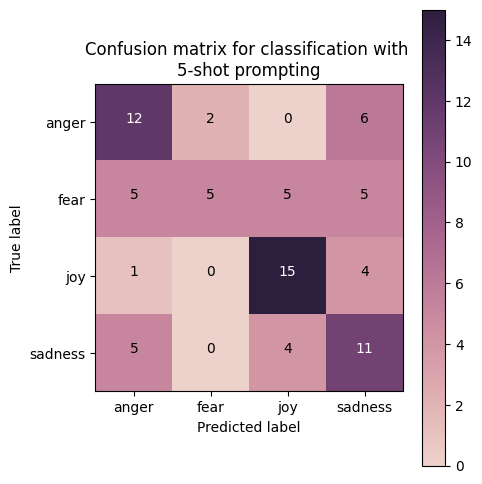

In [96]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [97]:
# Answer here
"""
1.模型綜合表現: 準確率(accuracy)、精確率(precision)及召回率(recall)接隨著給予的 example 數量增加，使得表現提升。
2.將 4 種情緒分別做討論: 
    anger: 0 shot 表現最優、1 shot 表現最差、5 shot 表現適中
    fear: 0 shot 表現最差、1 shot 表現適中、5 shot 表現最優
    joy: 0 shot 表現最差、1 shot 與 5 shot 表現相同
    sadness: 0 shot 表現最差、1 shot 表現適中、5 shot 表現最優
(1)可發現在大部分情形下給予 example 確實會讓模型的表現更加優秀，但有些情況則無效甚至更差，主要原因可能為 example 給的不夠精確，尤其是在我們這個例子中是用 sample 隨機取樣，這可能導致，模型受
到不好的 example 影響。
(2) 1 shot 的嘗試無法達到最優的表現主要原因可能為，只有一個例子使得 LLM 受到這個範例過多影響又沒有其他範例可以調整，若範例選得不好，反而對於模型表現沒有幫助。
"""

'\n1.模型綜合表現: 準確率(accuracy)、精確率(precision)及召回率(recall)接隨著給予的 example 數量增加，使得表現提升。\n2.將 4 種情緒分別做討論: \n    anger: 0 shot 表現最優、1 shot 表現最差、5 shot 表現適中\n    fear: 0 shot 表現最差、1 shot 表現適中、5 shot 表現最優\n    joy: 0 shot 表現最差、1 shot 與 5 shot 表現相同\n    sadness: 0 shot 表現最差、1 shot 表現適中、5 shot 表現最優\n(1)可發現在大部分情形下給予 example 確實會讓模型的表現更加優秀，但有些情況則無效甚至更差，主要原因可能為 example 給的不夠精確，尤其是在我們這個例子中是用 sample 隨機取樣，這可能導致，模型受\n到不好的 example 影響。\n(2) 1 shot 的嘗試無法達到最優的表現主要原因可能為，只有一個例子使得 LLM 受到這個範例過多影響又沒有其他範例可以調整，若範例選得不好，反而對於模型表現沒有幫助。\n'

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [98]:
# Answer here
import pandas as pd
# 讀取資料
df_0shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_0.csv")
df_1shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_1.csv")
df_5shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_5.csv")

# 將 text, true_emotion, 0 shot predicted_emotion, 1 shot predicted_emotion, 5 shot predicted_emotion 整理成合併的 df
df_compare = pd.concat([df_0shot, df_1shot["predicted_emotion"],df_5shot["predicted_emotion"]], axis = 1, ignore_index= True)

# 更新欄位名稱
df_compare.rename(columns={0: "text", 1: "true_emotion", 2: "0 shot predicted_emotion", 3: "1 shot predicted_emotion", 4: "5 shot predicted_emotion"}, inplace= True)
print(" DataFrame 格式")
display(df_compare.head()) # check dataframe
print("=========================================================================================================================")

# 1.text classification improves with more examples (pred emotion is right with examples)
# 找出 1 shot 比 0 shot 準確的資料
df_better_perf_by_1shot = df_compare[(df_compare["1 shot predicted_emotion"] == df_compare["true_emotion"]) & 
                                     (df_compare["0 shot predicted_emotion"] != df_compare["true_emotion"])]

# 找出 5 shot 比 1 shot 準確的資料 
df_better_perf_by_5shot = df_compare[(df_compare["1 shot predicted_emotion"] != df_compare["true_emotion"]) &
                                     (df_compare["5 shot predicted_emotion"] == df_compare["true_emotion"])]
print("1.範例增加幫助分類正確")
print(" 0 shot 分類錯誤 ； 1 shot 分類正確")
display(df_better_perf_by_1shot)
print(" 1 shot 分類錯誤 ； 5 shot 分類正確")
display(df_better_perf_by_5shot)
print("=========================================================================================================================")

# 2.cases where it does not improve (pred emotion always wrong)
# 找出 0 shot, 1 shot 預測錯誤的資料
df_no_help_perf_by_1shot = df_compare[(df_compare["1 shot predicted_emotion"] != df_compare["true_emotion"]) & 
                                     (df_compare["0 shot predicted_emotion"] != df_compare["true_emotion"])]

# 找出 0 shot, 1 shot , 5 shot 預測錯誤的資料
df_no_help_perf_by_5shot = df_compare[(df_compare["0 shot predicted_emotion"] != df_compare["true_emotion"]) & 
                                     (df_compare["1 shot predicted_emotion"] != df_compare["true_emotion"]) &
                                     (df_compare["5 shot predicted_emotion"] != df_compare["true_emotion"])]
                                     
print("2.範例增加沒有幫助分類正確\n0 shot, 1 shot , 5 shot 預測錯誤的資料")
display(df_no_help_perf_by_5shot)
print("=========================================================================================================================")

# 3.cases where the classification got worse with more examples (pred emotion goes from right to wrong with examples)
# 找出 1 shot 預測錯誤 0 shot 預測正確的資料
df_worst_perf_by_1shot = df_compare[(df_compare["1 shot predicted_emotion"] != df_compare["true_emotion"]) & 
                                     (df_compare["0 shot predicted_emotion"] == df_compare["true_emotion"])]

# 找出 5 shot 預測錯誤 0 shot , 1 shot 預測正確的資料
df_worst_perf_by_5shot = df_compare[(df_compare["0 shot predicted_emotion"] == df_compare["true_emotion"]) & 
                                     (df_compare["1 shot predicted_emotion"] == df_compare["true_emotion"]) &
                                     (df_compare["5 shot predicted_emotion"] != df_compare["true_emotion"])]

print("3.範例增加反而分類錯誤")
print("1 shot 分類錯誤 ； 0 shot 分類正確")
display(df_worst_perf_by_1shot)
print("5 shot 分類錯誤 ； 1 shot 分類正確")
display(df_worst_perf_by_5shot)

"""
1.範例增加幫助表現增加類別:
    (1)在 0 shot 判斷錯誤增加範例後正確的類別資料中很常將其歸類為 joy ， 這個情況在增加了範例後獲得好轉，可能原因為: (A)模型權重問題；(B)0 shot 時模型傾向正面回答，給予範例後，模型調整輸出權重。
    (2)在 0 shot 中可以發現判斷錯誤的類別為 fear, sadness ， 在給予範例後調整，可能原因與上述類似，在不給予範例時，模型傾向正面回答。
    (3)1 shot 雖然較 0 shot 調整了 7 個正確分類，但是在整體分類表現上不如 0 shot ，表示其他案例上分類錯誤，可能原因已在 exercise 6 說明。

2.範例增加沒有幫助模型表現:
    (1)few-shot prompting 還是有極限的，因為不是專門針對情緒分類來訓練的， LLM 在特殊任務表現上可能有所限制，若想要更進一步提升表現，應使用 fine tune 對模型做情緒分類任務的訓練，來調整 parameter。
    (2)text 內容有點像老師上課所說的 junk data ，非常缺乏明確證據，又夾雜了許多 superficial keyword 所以使 LLM 誤判。 
3.範例增加模型表現反而退步:
    (1)在 1 shot 的嘗試無法達到最優的表現主要原因可能為，只有一個例子使得 LLM 受到這個範例過多影響又沒有其他範例可以調整，若範例選得不好，反而對於模型表現沒有幫助。
    (2)上述情況在將範例提升到 5 shot 時獲得了極大程度的改善，分類有誤的案例僅剩 1 例，主要係因為(A)避免範例單一取樣差勁影響模型判斷；(B)增加範例可增加泛化能力越能代表整體。
"""

 DataFrame 格式


,text,true_emotion,0 shot predicted_emotion,1 shot predicted_emotion,5 shot predicted_emotion
0,I wouldn't have #anger issues.....if she didn'...,anger,anger,anger,anger
1,@IllinoisLoyalty that Rutgers game was an abom...,anger,anger,sadness,sadness
2,@danbloom1 beware the fury of a weak king,anger,anger,anger,fear
3,@UKBlogAwards @ModishMale I would always be ho...,anger,joy,joy,sadness
4,@HomeSwapperteam Spent months arranging swap ...,anger,anger,anger,anger


1.範例增加幫助分類正確
 0 shot 分類錯誤 ； 1 shot 分類正確


,text,true_emotion,0 shot predicted_emotion,1 shot predicted_emotion,5 shot predicted_emotion
8,@ArcticFantasy I would have almost took offens...,anger,joy,anger,anger
21,On @Varneyco/@FoxBusiness to talk latest on #C...,fear,anger,fear,joy
25,I know this is going to be one of those nights...,fear,sadness,fear,sadness
30,Bout ta get my @dontbreathe on up in here! @Wa...,fear,joy,fear,fear
34,"They'll be yo friend, shake your hand, then ki...",fear,anger,fear,fear
76,@AnjiDunlap droop in leggings? Are they wearin...,sadness,anger,sadness,anger


 1 shot 分類錯誤 ； 5 shot 分類正確


,text,true_emotion,0 shot predicted_emotion,1 shot predicted_emotion,5 shot predicted_emotion
7,@fluffysoftlouis no no. I insist that you give...,anger,joy,joy,anger
60,Rooney is 5 yards off the pace in a League Cup...,sadness,anger,anger,sadness


2.範例增加沒有幫助分類正確
0 shot, 1 shot , 5 shot 預測錯誤的資料


,text,true_emotion,0 shot predicted_emotion,1 shot predicted_emotion,5 shot predicted_emotion
3,@UKBlogAwards @ModishMale I would always be ho...,anger,joy,joy,sadness
14,Might just leave and aggravate bae,anger,sadness,sadness,sadness
15,Me being on my dean really saving a lot of ppl...,anger,sadness,sadness,sadness
16,I think @Sam_Canaday &amp; @KYLEJDOWSON must a...,anger,sadness,sadness,sadness
17,"I miss my gran singing Rawhide, in her deep ba...",anger,sadness,sadness,sadness
20,@SAHARTHERAPPER I unfollowed without hesitatio...,fear,joy,joy,joy
22,Nothing worse than an uber driver that can't d...,fear,anger,anger,anger
26,@TheDappaMc also £2.50 for a chocolate Feast i...,fear,anger,sadness,sadness
27,@ChrissyCostanza and have social anxiety. Ther...,fear,joy,sadness,sadness
28,It really is amazing the money they give to so...,fear,joy,joy,joy


3.範例增加反而分類錯誤
1 shot 分類錯誤 ； 0 shot 分類正確


,text,true_emotion,0 shot predicted_emotion,1 shot predicted_emotion,5 shot predicted_emotion
1,@IllinoisLoyalty that Rutgers game was an abom...,anger,anger,sadness,sadness
52,"@theclobra lol I thought maybe, couldn't decid...",joy,joy,sadness,sadness


5 shot 分類錯誤 ； 1 shot 分類正確


,text,true_emotion,0 shot predicted_emotion,1 shot predicted_emotion,5 shot predicted_emotion
2,@danbloom1 beware the fury of a weak king,anger,anger,anger,fear
9,"[ @HedgehogDylan ] *she would frown a bit, fol...",anger,anger,anger,fear
29,"@madhav_pastey moral of the story, never check...",fear,fear,fear,sadness


'\n1.範例增加幫助表現增加類別:\n    (1)在 0 shot 判斷錯誤增加範例後正確的類別資料中很常將其歸類為 joy ， 這個情況在增加了範例後獲得好轉，可能原因為: (A)模型權重問題；(B)0 shot 時模型傾向正面回答，給予範例後，模型調整輸出權重。\n    (2)在 0 shot 中可以發現判斷錯誤的類別為 fear, sadness ， 在給予範例後調整，可能原因與上述類似，在不給予範例時，模型傾向正面回答。\n    (3)1 shot 雖然較 0 shot 調整了 7 個正確分類，但是在整體分類表現上不如 0 shot ，表示其他案例上分類錯誤，可能原因已在 exercise 6 說明。\n\n2.範例增加沒有幫助模型表現:\n    (1)few-shot prompting 還是有極限的，因為不是專門針對情緒分類來訓練的， LLM 在特殊任務表現上可能有所限制，若想要更進一步提升表現，應使用 fine tune 對模型做情緒分類任務的訓練，來調整 parameter。\n    (2)text 內容有點像老師上課所說的 junk data ，非常缺乏明確證據，又夾雜了許多 superficial keyword 所以使 LLM 誤判。 \n3.範例增加模型表現反而退步:\n    (1)在 1 shot 的嘗試無法達到最優的表現主要原因可能為，只有一個例子使得 LLM 受到這個範例過多影響又沒有其他範例可以調整，若範例選得不好，反而對於模型表現沒有幫助。\n    (2)上述情況在將範例提升到 5 shot 時獲得了極大程度的改善，分類有誤的案例僅剩 1 例，主要係因為(A)避免範例單一取樣差勁影響模型判斷；(B)增加範例可增加泛化能力越能代表整體。\n'

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---